Inspration taken from https://towardsdatascience.com/5-data-science-projects-in-healthcare-that-will-get-you-hired-81003cadf2f3

In [1]:
%matplotlib inline
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stroke Data Set

source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
os.chdir("C:/users/akrue/healthdata")

In [3]:
df = pd.read_csv("C:/users/akrue/healthdata/healthcare-dataset-stroke-data.xls")

## Explorative Data Analysis

### Whole dataset, shape, missing values, dtypes

Getting used to the data set: Are there implausible values, outliers, etc.

TODO: description of columns

In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.describe(include='category')

ValueError: No objects to concatenate

In [ ]:
for col in df:
    if df[col].dtype == np.dtype('object'):
        df[col] = df[col].astype("category")
df.dtypes 

Learning: 5110 rows

Question: are there multiple data points for the same ID?

In [ ]:
len(df['id'])-len(df['id'].drop_duplicates())

Answer: No, working hypothesis: each row belongs to a different person.

In [ ]:
df.describe()

In [ ]:
df[df['bmi'].isnull()].shape

In [ ]:
df.columns

In [ ]:
for col in df:
    print(col + " is dtype " + str(df[col].dtype))

### Univartiat look at the data

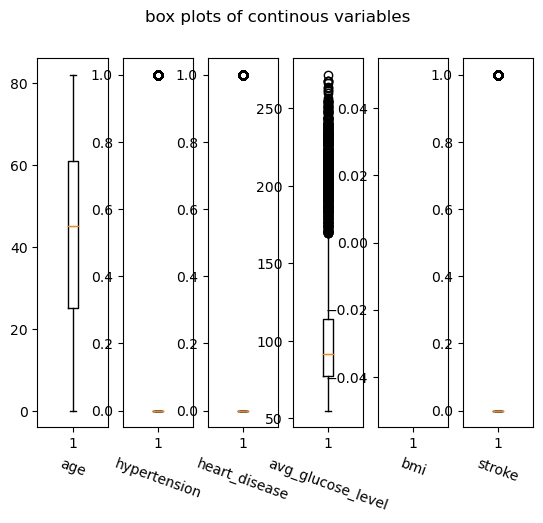

In [9]:
fig, axs = plt.subplots(1,6)
fig.suptitle('box plots of continous variables')
for i, col in enumerate(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']):
    axs[i].boxplot(df[col])
    axs[i].set_xlabel(col,rotation=-20)
plt.show()

In [10]:
for col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    print(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


In [11]:
"Learning: highly imbalanced, percent of data points with heart disease:"
df['heart_disease'].value_counts()[1]/df.shape[0]*100

5.401174168297456

Learning: column bmi has missing values

In [12]:
dfnan = df[df.isna().any(axis=1)]

In [13]:
dfnan.iloc[15:20]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,26015,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown,1
84,70042,Male,58.0,0,0,Yes,Private,Urban,71.20,NaN,Unknown,1
105,2346,Male,58.0,0,0,Yes,Private,Urban,82.30,NaN,smokes,1
112,36706,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,NaN,formerly smoked,1
124,14164,Female,72.0,0,0,Yes,Private,Urban,219.91,NaN,Unknown,1


### Bi-variat look at the data

In [14]:
df['stroke'].nunique()

2

('id', 'gender')


C:\Users\akrue\AppData\Local\Temp\ipykernel_10348\1906229808.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=comb[0], hue=comb[1], data=df)


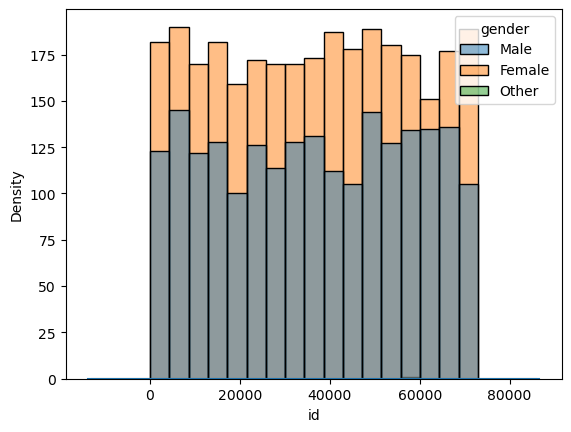

('id', 'age')


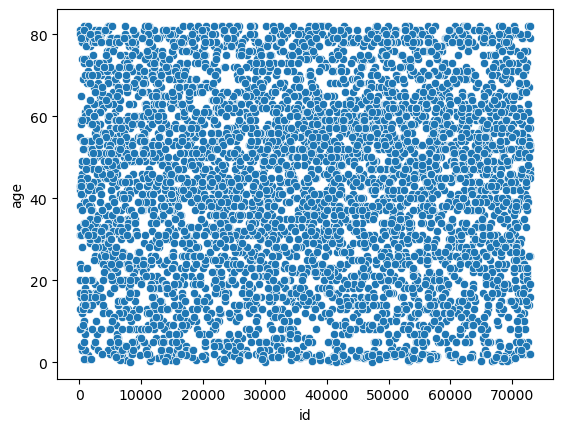

('id', 'hypertension')


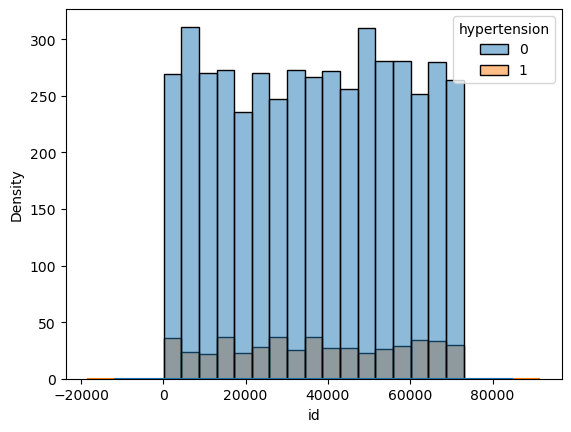

('id', 'heart_disease')


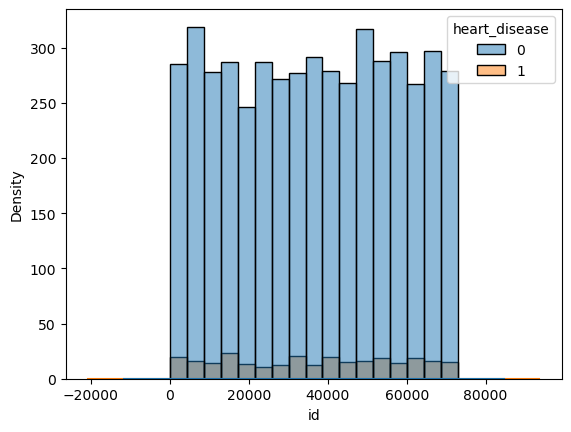

('id', 'ever_married')


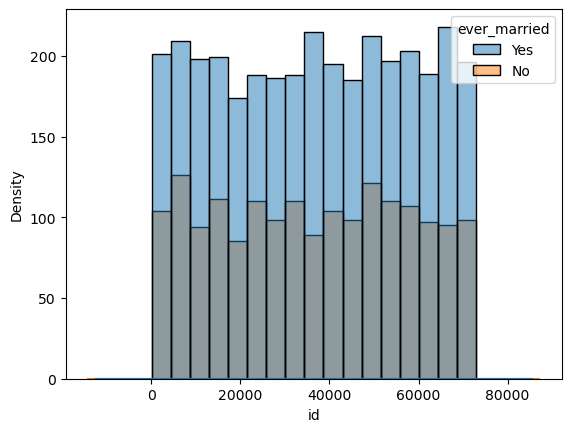

('id', 'work_type')


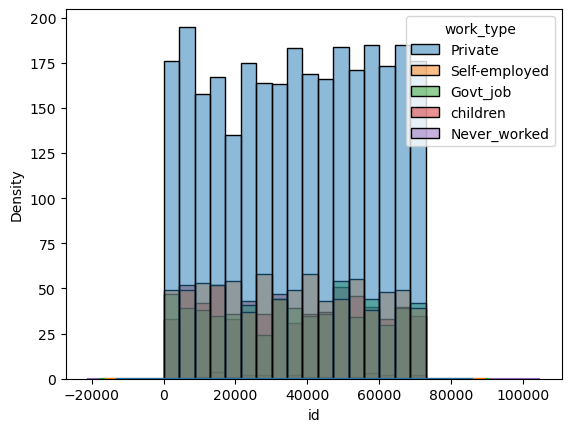

('id', 'Residence_type')


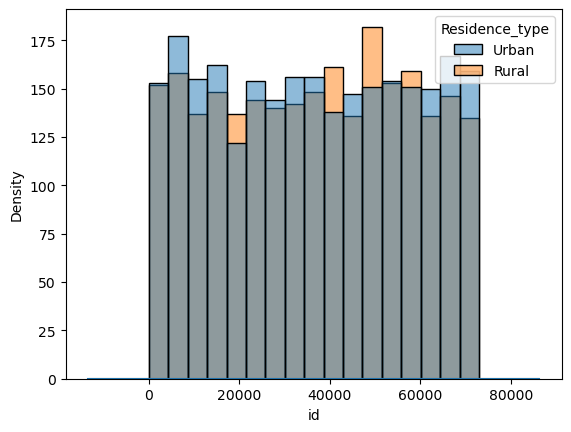

('id', 'avg_glucose_level')


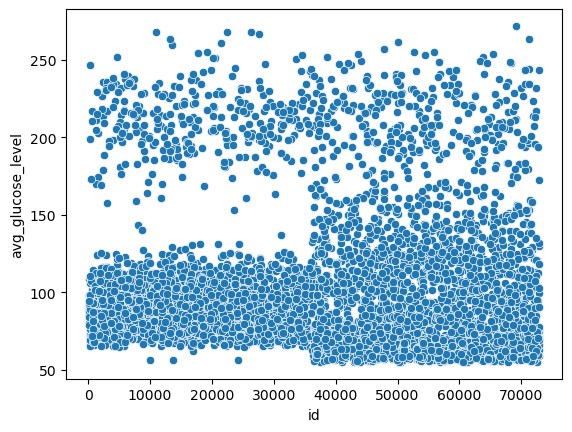

('id', 'bmi')


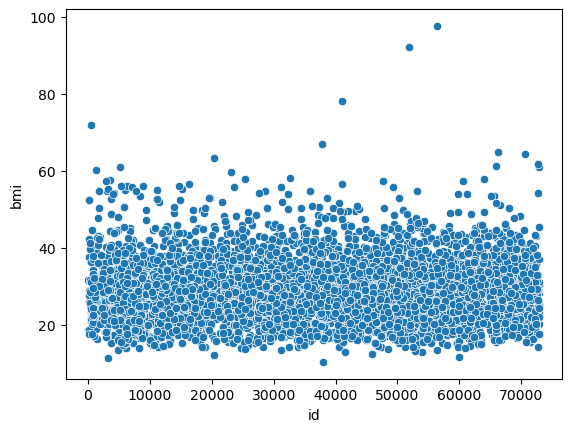

('id', 'smoking_status')


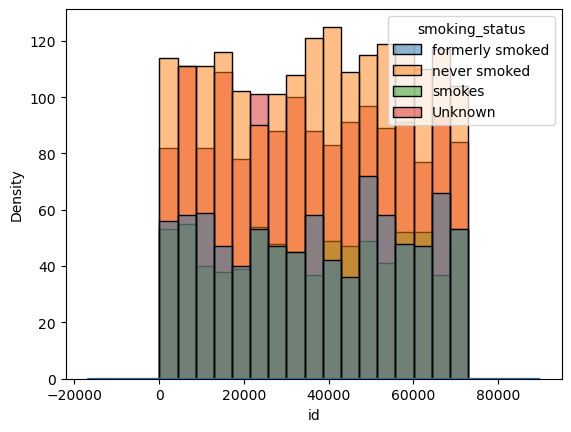

('id', 'stroke')


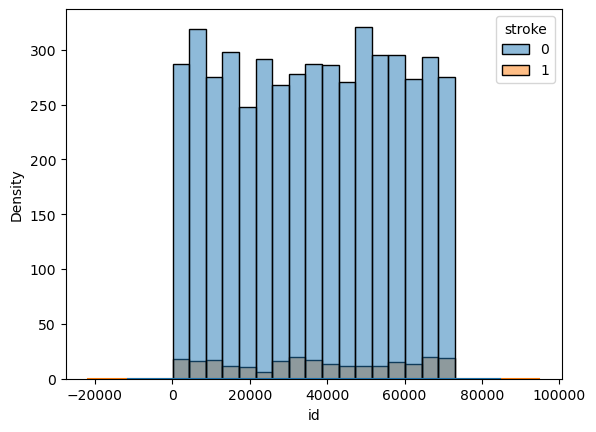

('gender', 'age')


C:\Users\akrue\AppData\Local\Temp\ipykernel_10348\1906229808.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=comb[1], hue=comb[0], data=df)


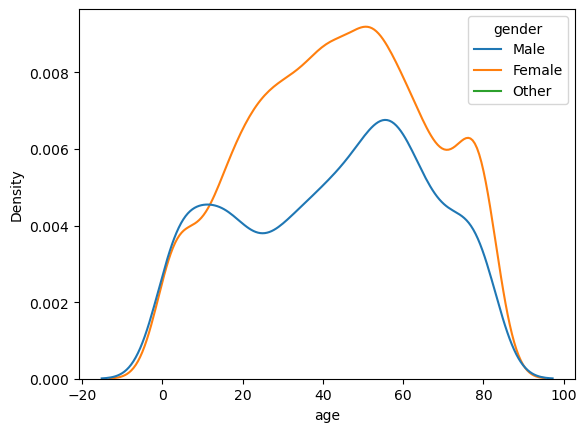

('gender', 'hypertension')


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

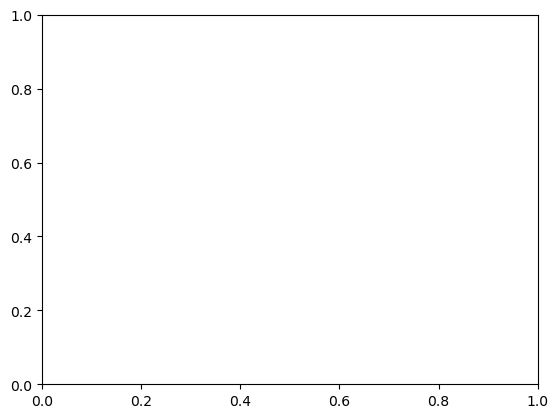

In [15]:
for comb in itertools.combinations(list(df.columns), 2):
    print(comb)
    if df[comb[1]].nunique() <= 5:
        sns.kdeplot(x=comb[0], hue=comb[1], data=df)
        sns.histplot(x=comb[0], hue=comb[1], data=df)
    elif df[comb[0]].nunique() <= 5:
         sns.kdeplot(x=comb[1], hue=comb[0], data=df)
    else:
        sns.scatterplot(x=comb[0], y=comb[1], data=df)
    plt.show()
    

In [ ]:
df.columns

In [ ]:
        sns.histplot(x='age', hue='work_type', data=df)


In [ ]:
fig, axs = plt.subplots(1,2)
sns.histplot(df, x="age", y="avg_glucose_level", hue="heart_disease", ax=axs[0])
sns.histplot(df, x="age", y="avg_glucose_level", hue="stroke", ax=axs[1])

In [ ]:
fig, axs = plt.subplots(1,2)
sns.histplot(df, x="age", y="bmi", hue="heart_disease", ax=axs[0])
sns.histplot(df, x="age", y="bmi", hue="stroke", ax=axs[1])

In [ ]:
df_stroke_and_heart = df[(df['stroke'] == 1) & (df['heart_disease'] == 1)]
df_neither_stroke_nor_heart = df[(df['stroke'] == 0) & (df['heart_disease'] == 0)]
df_either_stroke_or_heart =df[~df.isin(df_stroke_and_heart) & ~df.isin(df_neither_stroke_nor_heart)].dropna(how = 'all')

In [ ]:
df_stroke_and_heart[['heart_disease','stroke']].groupby(['heart_disease', 'stroke']).size()

In [ ]:
df_neither_stroke_nor_heart[['heart_disease','stroke']].groupby(['heart_disease', 'stroke']).size()

In [ ]:
df_either_stroke_or_heart[['heart_disease','stroke']].groupby(['heart_disease', 'stroke']).size()

<Axes: xlabel='age', ylabel='bmi'>

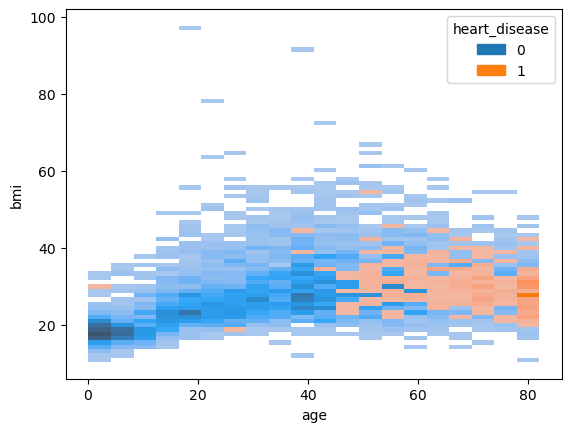

In [16]:
sns.histplot(df, x="age", y="bmi", hue="heart_disease")

<Axes: xlabel='age', ylabel='bmi'>

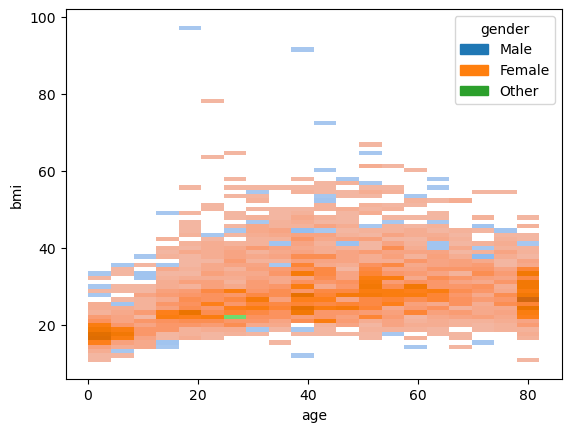

In [17]:
sns.histplot(df, x="age", y="bmi", hue="gender")

C:\Users\akrue\AppData\Local\Temp\ipykernel_10348\477394489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

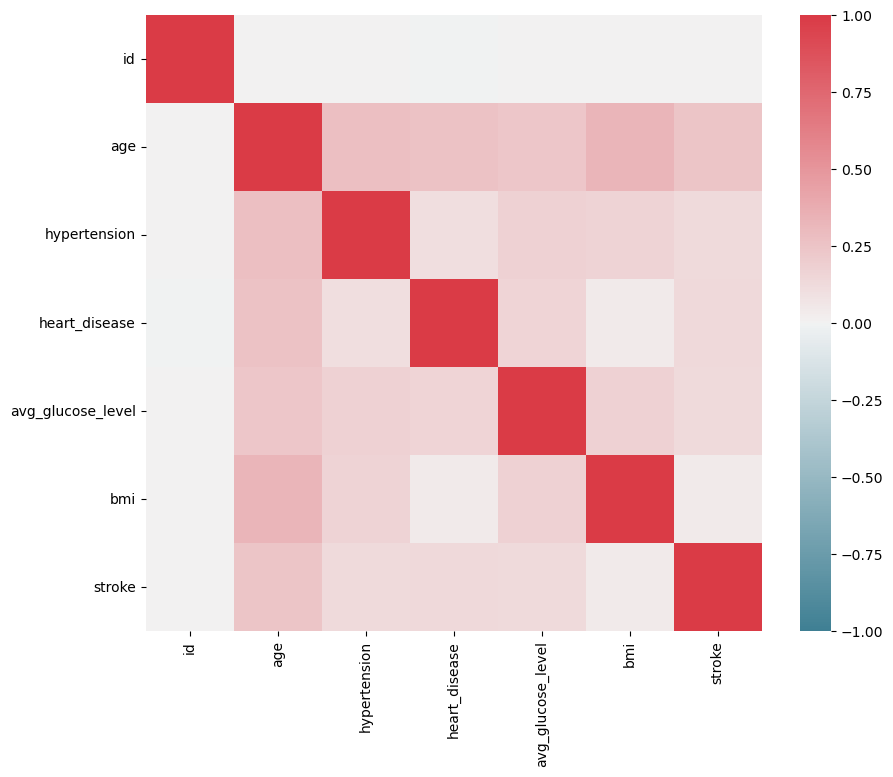

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

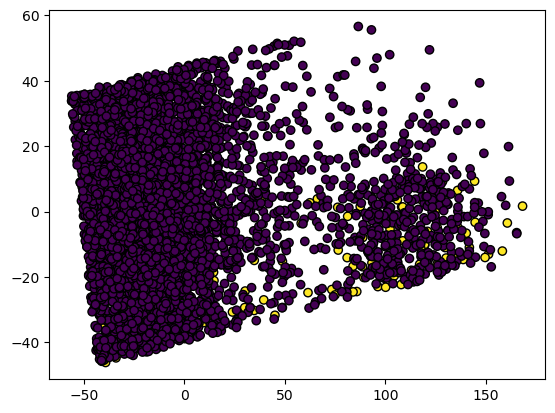

In [19]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause


# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)
dfna = df.dropna()
X = dfna[['age', 'hypertension', 'heart_disease','avg_glucose_level','bmi']]
y = dfna['stroke']


plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

In [20]:
from sklearn import preprocessing
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

In [21]:
categorials = {}
for col in df.select_dtypes(['category']):
    print(df[col].unique())
    categorials[col] = {}
    for i, string in enumerate(list(df[col].unique())):
        categorials[col].update({string: 1})

In [22]:
categorials['gender']

KeyError: 'gender'

In [23]:
list(df['gender'].unique())

['Male', 'Female', 'Other']

In [24]:
enc = preprocessing.OrdinalEncoder()


In [25]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [27]:
Xcont = df[['age', 'avg_glucose_level', 'bmi']]

In [28]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(Xcont)
Xcont_imp = imp_median.transform(Xcont)

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
binary_mask = y.isin([0, 1])
binary_y = y[binary_mask]
binary_Xcont_imp = Xcont_imp[binary_mask]
sampling_strategy = 1
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
Xcont_imp_res, y_res = rus.fit_resample(binary_Xcont_imp, binary_y)

In [36]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [39]:
scores = cross_val_score(clf, Xcont_imp_res, y_res, cv=10, n_jobs = -1)

In [40]:
scores

array([0.8      , 0.76     , 0.8      , 0.7      , 0.78     , 0.9      ,
       0.76     , 0.8      , 0.7755102, 0.7755102])